Background for loan default:
https://www.investopedia.com/terms/d/default2.asp

# Capstone - Loan Status Prediction Data Analysis

**Goal**: Build machine learning model(s) to predict loan status as target: if a loan will be charged-off (1), or stay current/are paid off (0). 

(1827125, 145)

Q: What factor is associated with not paying loan off?
- social credit
- networth
- debt>networth(saving and checking, cash on hand)
- past history of not paying off
- age (risk higher if younger)


https://www.wellsfargo.com/financial-education/credit-management/calculate-credit-score/#:~:text=This%20is%20based%20on%20the,if%20you%20pay%20on%20time
- 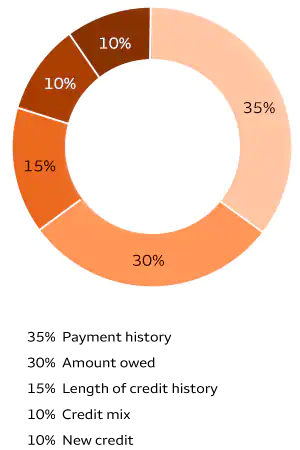

## Import packages

In [1]:
# Install packages
# import sys
# !{sys.executable} -m pip install kneed

# Get path 
import os
from pathlib import Path # get path

# Data wrangling
import pandas as pd
import numpy as np 
import math


# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot # qqplot for data normality test

# Statistical testing
import scipy.stats as stats


# Reporting
from pandas_profiling import ProfileReport


# PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.decomposition import PCA

#ML model building

# Logistic regression
from sklearn.linear_model import LogisticRegression #, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score


# Decision Tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from dmba import plotDecisionTree, textDecisionTree # tree visualization






import pydotplus


## Load dataset

In [2]:
# load dataset
data_path = Path('.').resolve().parents[1] / 'train_data.csv' 
train = pd.read_csv(data_path)

C:\Users\dengbo.yang\AppData\Local\Temp\ipykernel_15764\2671093429.py:3: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(data_path)


In [3]:
train.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN      10000        10000          10000.0   36 months   
1 NaN        NaN      10000        10000          10000.0   60 months   
2 NaN        NaN       4800         4800           4800.0   36 months   
3 NaN        NaN      35000        35000          35000.0   36 months   
4 NaN        NaN      16000        16000          15975.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0      8.81       317.12     A        A5  ...                            NaN   
1     27.27       306.97     E        E5  ...                            NaN   
2     16.91       170.92     C        C5  ...                            NaN   
3     14.47      1204.23     C        C2  ...                            NaN   
4     10.08       340.59     B        B1  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount  settlement_percentage settlement_term  
0               NaN                    NaN             NaN  
1               NaN                    NaN             NaN  
2               NaN                    NaN             NaN  
3               NaN                    NaN             NaN  
4               NaN                    NaN             NaN  

[5 rows x 145 columns]

In [4]:
train.shape

(1827125, 145)

In [5]:
train.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

Get rid of attributes only has fewer than 10% data 

In [6]:
na_tally = train.isna().sum().sort_values(ascending = False)

In [7]:
# list of >90% data missing 
na_tally[na_tally>train.shape[0]*0.9]

id                                            1827125
url                                           1827125
member_id                                     1827125
orig_projected_additional_accrued_interest    1822116
hardship_length                               1821000
hardship_reason                               1821000
hardship_status                               1821000
deferral_term                                 1821000
hardship_amount                               1821000
hardship_start_date                           1821000
hardship_end_date                             1821000
payment_plan_start_date                       1821000
hardship_dpd                                  1821000
hardship_loan_status                          1821000
hardship_payoff_balance_amount                1821000
hardship_last_payment_amount                  1821000
hardship_type                                 1821000
debt_settlement_flag_date                     1810175
settlement_status           

## Create modified Training dataset for model building - `trn`
1. remove >90% missing value columns
2. create dummy variable for target variable: 0='charged off', 1='Fully paid' or 'Current'

Charged off event rate is: 
paid off: 0.9269201614558391


In [15]:
# Get trn dataset
trn = train.copy().drop(columns=na_tally[na_tally>train.shape[0]*0.9].index)

# target variable and transformation
print(trn['loan_status'].unique())

trn['loan_status_dv'] = [0 if loan_status=='Fully Paid'or loan_status=='Current' else 1 for loan_status in trn['loan_status']]
print("Charged off event rate is: {}".format(trn['loan_status_dv'].mean()))
print("Paid off event rate is: {}".format(1-trn['loan_status_dv'].mean()))

['Charged Off' 'Current' 'Fully Paid']
Charged off event rate is: 0.0730798385441609
Paid off event rate is: 0.9269201614558391


In [9]:
###### optional to run #########
# sample a 3_pct dataset to investigate 

# trn_sample_3pct = trn.sample(n = int(trn.shape[0]*0.03), replace = False, random_state=2) # 91356
# trn_sample_3pct.to_csv('trn_sample_3pct.csv')  

In [10]:
trn['loan_status'].value_counts()

Fully Paid     865468
Current        828131
Charged Off    133526
Name: loan_status, dtype: int64

In [11]:
trn.shape

(1827125, 108)

In [12]:
trn_coln = trn.columns
trn_coln.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_ba

In [13]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827125 entries, 0 to 1827124
Columns: 108 entries, loan_amnt to loan_status_dv
dtypes: float64(80), int64(5), object(23)
memory usage: 1.5+ GB


# Exploratory data analysis  
Goal to select features for training

Final outcome: `trn_dropEDA` dataset

Features dropped:
- object to drop: coln_obj_drop
- int, float to drop: funded_amntm, funded_amnt_inv, out_prncp_inv,total_pymnt_inv
- Int type feature to train: loan_amnt, revol_bal


In [ ]:
profile = ProfileReport(trn, minimal=True, title="Loans trn Profiling Report")
#profile.to_file("trn_profile.html")

In [18]:
# check NAs - 38 columns with NA
trn.isna().sum().sort_values(ascending=False).head(38)

mths_since_last_record            1532158
mths_since_recent_bc_dlq          1396890
mths_since_last_major_derog       1346127
mths_since_recent_revol_delinq    1216894
next_pymnt_d                       998994
mths_since_last_delinq             932516
il_util                            815757
mths_since_rcnt_il                 679739
all_util                           642907
open_acc_6m                        642717
inq_last_12m                       642717
total_cu_tl                        642717
total_bal_il                       642716
open_rv_12m                        642716
open_il_24m                        642716
open_act_il                        642716
open_rv_24m                        642716
max_bal_bc                         642716
inq_fi                             642716
open_il_12m                        642716
mths_since_recent_inq              206528
emp_title                          134953
emp_length                         119754
num_tl_120dpd_2m                  

## Potential critical features

Some critical:


`loan_amnt`, `int_rate`, `grade`,`term`, `emp_length`,`annual_inc`,`dti`,`mths_since_recent_inq`,`revol_util`,`bc_open_to_buy`,`bc_util`,`num_op_rev_tl`

...

In [19]:
trn[['loan_amnt', 'int_rate', 'grade', 'term', 'emp_length', 'annual_inc', 'dti',
    'mths_since_recent_inq', 'revol_util', 'bc_open_to_buy', 'bc_util', 'num_op_rev_tl']].describe()

loan_amnt      int_rate    annual_inc           dti  \
count  1.827125e+06  1.827125e+06  1.827125e+06  1.825674e+06   
mean   1.510492e+04  1.292467e+01  7.879205e+04  1.889208e+01   
std    9.232365e+03  4.797679e+00  1.207525e+05  1.444896e+01   
min    1.000000e+03  5.310000e+00  0.000000e+00 -1.000000e+00   
25%    8.000000e+03  9.440000e+00  4.700000e+04  1.193000e+01   
50%    1.300000e+04  1.249000e+01  6.500000e+04  1.786000e+01   
75%    2.000000e+04  1.561000e+01  9.500000e+04  2.456000e+01   
max    4.000000e+04  3.099000e+01  1.100000e+08  9.990000e+02   

       mths_since_recent_inq    revol_util  bc_open_to_buy       bc_util  \
count           1.620597e+06  1.825711e+06    1.806682e+06  1.805771e+06   
mean            7.090876e+00  4.995529e+01    1.167344e+04  5.743015e+01   
std             5.979832e+00  2.463651e+01    1.685201e+04  2.859107e+01   
min             0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
25%             2.000000e+00  3.110000e+01    1.791000e+03  3.480000e+01   
50%             6.000000e+00  4.970000e+01    5.629000e+03  5.950000e+01   
75%             1.100000e+01  6.890000e+01    1.459900e+04  8.260000e+01   
max             2.500000e+01  8.923000e+02    7.111400e+05  3.396000e+02   

       num_op_rev_tl  
count   1.827125e+06  
mean    8.233844e+00  
std     4.688064e+00  
min     0.000000e+00  
25%     5.000000e+00  
50%     7.000000e+00  
75%     1.000000e+01  
max     9.100000e+01

##  Feature understanding & selection
 


### Column types

In [20]:
col_types = trn.dtypes.to_frame('dtypes').reset_index()
print(col_types['dtypes'].value_counts())

float64    80
object     23
int64       5
Name: dtypes, dtype: int64


In [21]:
print(col_types[col_types['dtypes']=='int64'])
print(col_types[col_types['dtypes']=='float64'])
print(col_types[col_types['dtypes']=='O']['index']) # object types may affect model training

              index dtypes
0         loan_amnt  int64
1       funded_amnt  int64
28        revol_bal  int64
47      policy_code  int64
107  loan_status_dv  int64
                          index   dtypes
2               funded_amnt_inv  float64
4                      int_rate  float64
5                   installment  float64
11                   annual_inc  float64
20                          dti  float64
..                          ...      ...
99                    tax_liens  float64
100             tot_hi_cred_lim  float64
101           total_bal_ex_mort  float64
102              total_bc_limit  float64
103  total_il_high_credit_limit  float64

[80 rows x 2 columns]
3                      term
6                     grade
7                 sub_grade
8                 emp_title
9                emp_length
10           home_ownership
12      verification_status
13                  issue_d
14              loan_status
15               pymnt_plan
16                  purpose
17             

### Investigate int and float features

Remove `policy_code` due to one unique value in entire dataset

Remove due to high correlations:
`funded_amnt`, `funded_amnt_inv`, `out_prncp_inv`, `total_pymnt_inv`

Some float and int maybe categorical

#### Int and float summaries

In [22]:
coln_int = col_types[col_types['dtypes']=='int64']['index']
for col in trn[coln_int]:
    print(trn[coln_int][col].unique())

[10000  4800 35000 ... 36075 36100 35125]
[10000  4800 35000 ... 36075 36100 35125]
[ 10494   3193   2809 ...  87844 110143  64696]
[1]
[1 0]


In [23]:
coln_float = col_types[col_types['dtypes']=='float64']['index']
col_float_unique = []
for col in trn[coln_float]:
    col_float_unique.append(trn[coln_float][col].unique())
# col_float_unique

In [24]:
coln_float_counts = coln_float.to_frame()
coln_float_counts['values'] = col_float_unique
coln_float_counts
# coln_float_counts.to_csv('coln_float_counts.csv')  

index  \
2               funded_amnt_inv   
4                      int_rate   
5                   installment   
11                   annual_inc   
20                          dti   
..                          ...   
99                    tax_liens   
100             tot_hi_cred_lim   
101           total_bal_ex_mort   
102              total_bc_limit   
103  total_il_high_credit_limit   

                                                values  
2    [10000.0, 4800.0, 35000.0, 15975.0, 7500.0, 34...  
4    [8.81, 27.27, 16.91, 14.47, 10.08, 13.56, 15.0...  
5    [317.12, 306.97, 170.92, 1204.23, 340.59, 267....  
11   [56000.0, 70000.0, 111000.0, 95000.0, 45000.0,...  
20   [20.53, 11.37, 13.35, 11.61, 25.52, 0.21, 10.3...  
..                                                 ...  
99   [0.0, 1.0, 2.0, 4.0, 3.0, 5.0, 7.0, 8.0, 6.0, ...  
100  [327790.0, 25493.0, 41728.0, 501756.0, 85395.0...  
101  [30771.0, 23289.0, 32060.0, 56195.0, 28179.0, ...  
102  [12000.0, 1800.0, 7100.0, 0.0, 31100.0, 3500.0...  
103  [34590.0, 21693.0, 33584.0, 62815.0, 30195.0, ...  

[80 rows x 2 columns]

In [25]:
trn[coln_int].corr()

loan_amnt  funded_amnt  revol_bal  policy_code  loan_status_dv
loan_amnt        1.000000     0.999999   0.321272          NaN        0.016071
funded_amnt      0.999999     1.000000   0.321272          NaN        0.016071
revol_bal        0.321272     0.321272   1.000000          NaN       -0.017157
policy_code           NaN          NaN        NaN          NaN             NaN
loan_status_dv   0.016071     0.016071  -0.017157          NaN        1.000000

#### loan_amnt and funded_amnt - remove funded_amnt 
Remove funded_amnt and funded_amnt_inv. >0.999999 correlation with loan_amnt

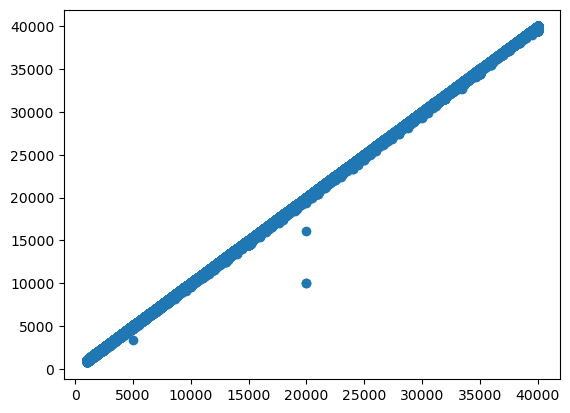

In [26]:
plt.scatter(trn['loan_amnt'],trn['funded_amnt_inv'])

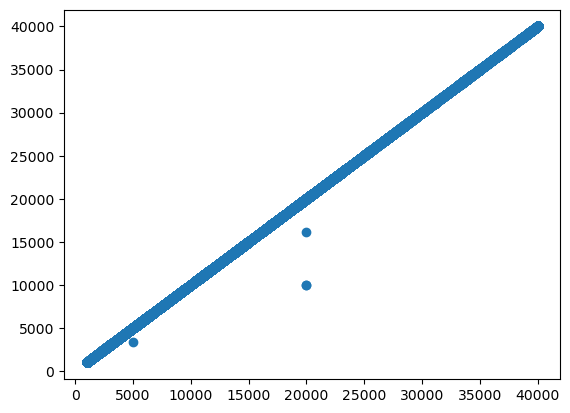

In [27]:
plt.scatter(trn['loan_amnt'],trn['funded_amnt'])

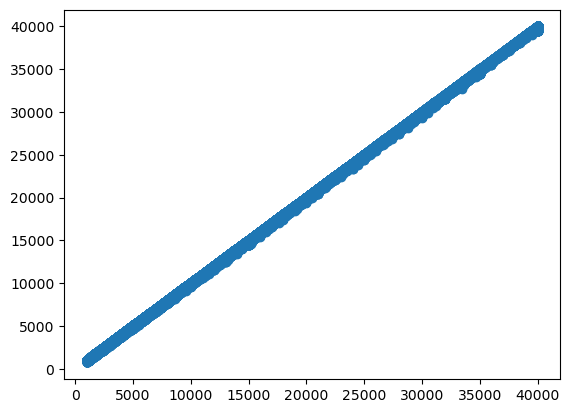

In [28]:
plt.scatter(trn['funded_amnt'],trn['funded_amnt_inv'])

In [29]:
trn[['loan_amnt','funded_amnt','funded_amnt_inv']].corr()

loan_amnt  funded_amnt  funded_amnt_inv
loan_amnt         1.000000     0.999999         0.999994
funded_amnt       0.999999     1.000000         0.999995
funded_amnt_inv   0.999994     0.999995         1.000000

#### Feature with invs - remove invs 
Very high correlation between out_prncp,total_pymnt, funded_amnt and their _inv counterparts

In [30]:
print(trn[['out_prncp','out_prncp_inv']].corr())
print(trn[['total_pymnt','total_pymnt_inv']].corr())
print(trn[['funded_amnt','funded_amnt_inv']].corr())

               out_prncp  out_prncp_inv
out_prncp       1.000000       0.999999
out_prncp_inv   0.999999       1.000000
                 total_pymnt  total_pymnt_inv
total_pymnt         1.000000         0.999996
total_pymnt_inv     0.999996         1.000000
                 funded_amnt  funded_amnt_inv
funded_amnt         1.000000         0.999995
funded_amnt_inv     0.999995         1.000000


### Investigate object/categorical features that have few unique values
Use Chi-square to test significance. Cramer's V for strength of association (<0.1 weak association, >0.5 strong association)

Null hypothesis: There is no significant relationship between two categorical variables.

- term
- grade & sub_grade
- ~verification_status~
- ~pymnt_plan~
- ~initial_list_status~
- ~application_type~
- ~hardship_flag~
- ~disbursement_method~
- debt_settlement_flag

time_coln = ['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']


'emp_title', 'emp_length', 'home_ownership', 'purpose', 'title', 'zip_code', 'addr_state',
       
Charged off (loan_status_dv=0) event rate is: 0####### update

In [31]:
coln_obj = col_types[col_types['dtypes']=='O']['index'] # object types may affect model training
trn[coln_obj];

In [32]:
coln_obj

3                      term
6                     grade
7                 sub_grade
8                 emp_title
9                emp_length
10           home_ownership
12      verification_status
13                  issue_d
14              loan_status
15               pymnt_plan
16                  purpose
17                    title
18                 zip_code
19               addr_state
22         earliest_cr_line
31      initial_list_status
41             last_pymnt_d
43             next_pymnt_d
44       last_credit_pull_d
48         application_type
104           hardship_flag
105     disbursement_method
106    debt_settlement_flag
Name: index, dtype: object

In [33]:
# check unique values in object columns
for col in trn[coln_obj]:
    print(trn[coln_obj][col].unique())

[' 36 months' ' 60 months']
['A' 'E' 'C' 'B' 'D' 'G' 'F']
['A5' 'E5' 'C5' 'C2' 'B1' 'C1' 'C3' 'B2' 'D2' 'D3' 'B3' 'A2' 'E3' 'G1'
 'B4' 'D4' 'B5' 'E2' 'E4' 'D1' 'A4' 'D5' 'C4' 'A1' 'F2' 'F1' 'E1' 'F4'
 'F5' 'A3' 'G2' 'F3' 'G4' 'G3' 'G5']
[nan 'CNC Robotic Welder' 'Information Tech II' ... 'Acft mechanic'
 'Content Review ' 'BABYSITTER']
[nan '10+ years' '1 year' '< 1 year' '4 years' '6 years' '3 years'
 '2 years' '7 years' '8 years' '5 years' '9 years']
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE']
['Verified' 'Source Verified' 'Not Verified']
['Nov-2018' 'Oct-2018' 'Sep-2018' 'Aug-2018' 'Jul-2018' 'Jun-2018'
 'May-2018' 'Apr-2018' 'Mar-2018' 'Feb-2018' 'Jan-2018' 'Sep-2016'
 'Aug-2016' 'Jul-2016' 'Jun-2016' 'May-2016' 'Apr-2016' 'Mar-2016'
 'Feb-2016' 'Jan-2016' 'Dec-2016' 'Nov-2016' 'Oct-2016' 'Dec-2015'
 'Nov-2015' 'Oct-2015' 'Sep-2015' 'Aug-2015' 'Jul-2015' 'Jun-2015'
 'May-2015' 'Apr-2015' 'Mar-2015' 'Feb-2015' 'Jan-2015' 'Mar-2017'
 'Feb-2017' 'Jan-2017' 'Sep-2017' 'Aug-2017' 'Jul-2017' 

['AZ' 'IL' 'VA' 'TX' 'MN' 'NC' 'ME' 'SC' 'MA' 'MI' 'DE' 'OK' 'CA' 'LA'
 'NJ' 'TN' 'MD' 'WA' 'NE' 'UT' 'PA' 'FL' 'KS' 'IN' 'NY' 'MO' 'GA' 'KY'
 'NV' 'ID' 'OH' 'AL' 'MS' 'CO' 'WY' 'CT' 'WI' 'HI' 'VT' 'DC' 'NM' 'WV'
 'OR' 'NH' 'AR' 'RI' 'MT' 'ND' 'SD' 'AK' 'IA']
['Apr-2011' 'Nov-2008' 'Jun-2006' 'Jun-2005' 'Feb-2013' 'Aug-2003'
 'Feb-2005' 'Oct-2007' 'Aug-2012' 'Sep-1993' 'Nov-2000' 'Sep-2007'
 'Dec-2000' 'Dec-1989' 'Oct-2012' 'Jul-1995' 'Dec-1999' 'Aug-2001'
 'Aug-1990' 'Jan-2012' 'Mar-2006' 'Nov-2005' 'Aug-2015' 'Jan-2010'
 'Apr-2008' 'Aug-2005' 'Oct-2008' 'Sep-2002' 'Oct-2004' 'Apr-1988'
 'Dec-2005' 'Apr-2006' 'Feb-2007' 'Sep-2008' 'Jun-1999' 'Oct-1992'
 'Jan-1996' 'Jul-2008' 'Nov-2001' 'Jun-2003' 'Jan-1977' 'Oct-2009'
 'Jul-2013' 'Oct-1985' 'Jul-1989' 'Nov-1980' 'Jul-2010' 'May-1978'
 'Aug-2011' 'Jun-1995' 'Sep-2000' 'May-2006' 'Aug-2009' 'Dec-2013'
 'Sep-2006' 'Jun-1977' 'Dec-1993' 'May-2002' 'Nov-2006' 'Oct-2014'
 'Apr-2009' 'Oct-1996' 'Dec-2003' 'Oct-2003' 'Aug-2008' 'Dec-2010'
 'M

['w' 'f']
[nan 'Dec-2018' 'Nov-2018' 'Jan-2019' 'Oct-2018' 'Sep-2018' 'Aug-2018'
 'Feb-2019' 'Jul-2018' 'Jun-2018' 'May-2018' 'Apr-2018' 'Mar-2018'
 'Feb-2018' 'Jan-2018' 'Nov-2017' 'May-2017' 'Aug-2017' 'Jun-2017'
 'Apr-2017' 'Mar-2017' 'Sep-2017' 'Dec-2016' 'Jan-2017' 'Jul-2017'
 'Oct-2017' 'Dec-2017' 'Nov-2016' 'Feb-2017' 'Oct-2016' 'Sep-2016'
 'Aug-2016' 'Jul-2016' 'Jun-2016' 'May-2016' 'Apr-2016' 'Mar-2016'
 'Feb-2016' 'Jan-2016' 'Dec-2015' 'Nov-2015' 'Oct-2015' 'Sep-2015'
 'Aug-2015' 'Jul-2015' 'Jun-2015' 'May-2015' 'Apr-2015' 'Mar-2015'
 'Feb-2015' 'Dec-2014' 'Mar-2014' 'Jul-2014' 'May-2014' 'Jan-2015'
 'Nov-2014' 'Aug-2014' 'Oct-2014' 'Sep-2014' 'Apr-2014' 'Jun-2014'
 'Feb-2014' 'Jan-2014' 'Dec-2013' 'Nov-2013' 'Oct-2013' 'Sep-2013'
 'Aug-2013' 'Jul-2013' 'Jun-2013' 'May-2013' 'Apr-2013' 'Mar-2013'
 'Feb-2013']
[nan 'Mar-2019' 'Feb-2019' 'Apr-2019' 'Dec-2018' 'Sep-2018' 'Aug-2018'
 'Feb-2018']
['Jan-2019' 'Feb-2019' 'Nov-2018' 'Dec-2018' 'Oct-2018' 'Sep-2018'
 'Aug-2018' 'Jul-2

#### term
may remove

In [34]:
trn[['term','loan_status_dv']].value_counts(normalize=True)

term        loan_status_dv
 36 months  0                 0.671751
 60 months  0                 0.255169
 36 months  1                 0.044452
 60 months  1                 0.028627
dtype: float64

In [35]:
data = pd.crosstab(trn['term'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 8255.671704129067
p-value: 0.0
Cramer_V: 0.06722133680220137


#### grade & sub_grade
top default grade loan C, D, B; stronger association in sub_grade

In [36]:
trn[['loan_status_dv','grade']].value_counts(normalize=True).sort_index()

loan_status_dv  grade
0               A        0.195649
                B        0.284433
                C        0.264657
                D        0.121461
                E        0.045292
                F        0.012139
                G        0.003288
1               A        0.003694
                B        0.013987
                C        0.023561
                D        0.016711
                E        0.009927
                F        0.003937
                G        0.001264
dtype: float64

In [37]:
trn[['loan_status_dv', 'sub_grade']].value_counts(normalize=True).sort_values(
    ascending=False).to_frame().reset_index().sort_values(['loan_status_dv', 0], ascending=False).tail(40)

loan_status_dv sub_grade         0
65               1        A1  0.000362
66               1        G2  0.000292
67               1        G3  0.000225
68               1        G4  0.000196
69               1        G5  0.000165
0                0        C1  0.060506
1                0        B4  0.059312
2                0        B5  0.058796
3                0        B1  0.055604
4                0        B2  0.055375
5                0        B3  0.055346
6                0        C2  0.053347
7                0        C3  0.052987
8                0        C4  0.051139
9                0        A5  0.047606
10               0        C5  0.046678
11               0        A4  0.042426
12               0        A1  0.040622
13               0        A3  0.033154
14               0        A2  0.031841
15               0        D1  0.031463
16               0        D2  0.027488
17               0        D3  0.024300
18               0        D4  0.020846
19               0        D5  0.017365
20               0        E1  0.011428
21               0        E2  0.009938
22               0        E3  0.008892
23               0        E5  0.007567
24               0        E4  0.007467
30               0        F1  0.004113
39               0        F2  0.002674
41               0        F3  0.002242
47               0        F4  0.001691
50               0        F5  0.001419
51               0        G1  0.001184
56               0        G2  0.000707
58               0        G3  0.000553
61               0        G4  0.000443
63               0        G5  0.000401

In [38]:
data = pd.crosstab(trn['grade'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 65545.81092960323
p-value: 0.0
Cramer_V: 0.18940364844059815


In [39]:
data = pd.crosstab(trn['sub_grade'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 67869.88355902435
p-value: 0.0
Cramer_V: 0.1927322635693128


#### verification_status
Remove

In [40]:
trn[['verification_status','loan_status_dv']].value_counts(normalize=True).sort_index()

verification_status  loan_status_dv
Not Verified         0                 0.317170
                     1                 0.015720
Source Verified      0                 0.367329
                     1                 0.030374
Verified             0                 0.242421
                     1                 0.026986
dtype: float64

In [41]:
data = pd.crosstab(trn['verification_status'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 11450.811364192554
p-value: 0.0
Cramer_V: 0.07916514292617349


#### pymnt_plan
Remove, only 0.0002% people (3.65) on payment plan, too few samples, chi-square test p-value = 1.0, Cramer's V weak

In [42]:
trn[['pymnt_plan','loan_status_dv']].value_counts().sort_index()

pymnt_plan  loan_status_dv
n           0                 1693596
            1                  133526
y           0                       3
dtype: int64

In [43]:
data = pd.crosstab(trn['pymnt_plan'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 0.0
p-value: 1.0
Cramer_V: 0.0003597944660247935


#### initial_list_status
Remove

In [44]:
trn[['initial_list_status','loan_status_dv']].value_counts(normalize=True)

initial_list_status  loan_status_dv
w                    0                 0.665610
f                    0                 0.261310
w                    1                 0.045061
f                    1                 0.028019
dtype: float64

In [45]:
data = pd.crosstab(trn['initial_list_status'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 6199.4102537662275
p-value: 0.0
Cramer_V: 0.05825166540995237


#### application_type
Remove

In [46]:
trn[['application_type','loan_status_dv']].value_counts(normalize=True)

application_type  loan_status_dv
Individual        0                 0.872361
                  1                 0.071434
Joint App         0                 0.054559
                  1                 0.001646
dtype: float64

In [47]:
data = pd.crosstab(trn['application_type'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 3079.3552424698796
p-value: 0.0
Cramer_V: 0.04105764713425525


#### hardship_flag
Remove. hardship_flag only has 9 'Y' record paid-off

In [48]:
trn[['hardship_flag','loan_status_dv']].value_counts()

hardship_flag  loan_status_dv
N              0                 1693590
               1                  133526
Y              0                       9
dtype: int64

In [49]:
data = pd.crosstab(trn['hardship_flag'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 0.040802357461754826
p-value: 0.8399199026518551
Cramer_V: 0.0006231833186590913


#### disbursement_method
Remove

In [50]:
trn[['disbursement_method','loan_status_dv']].value_counts(normalize=True)

disbursement_method  loan_status_dv
Cash                 0                 0.889524
                     1                 0.072716
DirectPay            0                 0.037396
                     1                 0.000364
dtype: float64

In [51]:
data = pd.crosstab(trn['disbursement_method'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 4259.089020684353
p-value: 0.0
Cramer_V: 0.048286290564561414


#### debt_settlement_flag
Def.: Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.

Expecting only Y in charged-off (0) category. 23 records maybe misclassified? 

may keep

In [52]:
trn[['debt_settlement_flag','loan_status_dv']].value_counts()

debt_settlement_flag  loan_status_dv
N                     0                 1693576
                      1                  116599
Y                     1                   16927
                      0                      23
dtype: int64

In [53]:
data = pd.crosstab(trn['debt_settlement_flag'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 216352.5380307116
p-value: 0.0
Cramer_V: 0.34412062953067346


### Rest of objects except time
~'emp_title'~, 'emp_length', ~'home_ownership'~, 'purpose', ~'title'~, ~'zip_code'~, 'addr_state'

Remove `title` due to large unique values and are designated by borrowers, use 'purpose'

A lot of 'managers' in default categories, remove `emp_title` (due to large unique values 401006) for now, may need text mining and add feature in the future

Remove `home_ownership` due to lower Cramer_V score. 'Own'ing a home would still have default results. 'Any' and 'None' does not make sense. Need more clarifications on the feature.

Remove `zip_code` and use addr_state instead to avoid potential overfitting.

In [54]:
# Title vs Purpose
print(f"Unique 'title' values: {len(trn['title'].unique())}") 
trn['purpose'].unique() # 14 loan categories
# trn[trn['purpose']=='debt_consolidation']['title'].unique()

Unique 'title' values: 29127


array(['debt_consolidation', 'home_improvement', 'major_purchase',
       'credit_card', 'moving', 'medical', 'small_business', 'other',
       'house', 'car', 'vacation', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

Unique emp_title: 401006


<AxesSubplot: >

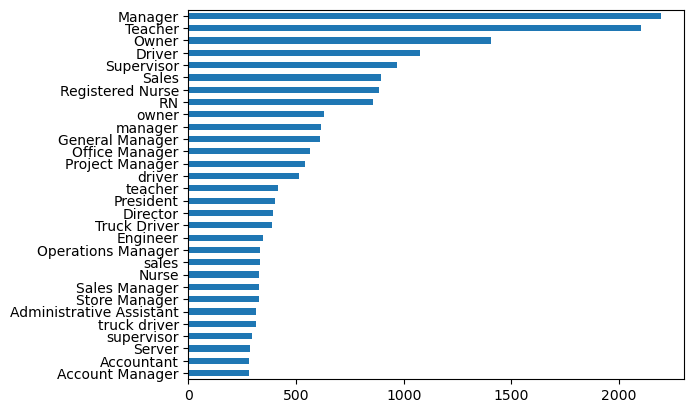

In [58]:
# emp_title
print(f"Unique emp_title: {len(trn['emp_title'].unique())}")
trn[trn['loan_status_dv']==1]['emp_title'].value_counts().head(30).sort_values().plot(kind = 'barh')

In [56]:
print(trn[['home_ownership','loan_status_dv']].value_counts().sort_index())

data = pd.crosstab(trn['home_ownership'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

home_ownership  loan_status_dv
ANY             0                    827
                1                     31
MORTGAGE        0                 851184
                1                  57028
NONE            0                      4
OWN             0                 192091
                1                  14901
RENT            0                 649493
                1                  61566
dtype: int64
Chi_square statistic: 3354.5556657006987
p-value: 0.0
Cramer_V: 0.04284827784782682


In [57]:
trn[['emp_length', 'purpose', 'addr_state']]

for col in trn[['emp_length', 'purpose', 'addr_state']]:
    print(trn[['emp_length', 'purpose', 'addr_state']][col].unique())

[nan '10+ years' '1 year' '< 1 year' '4 years' '6 years' '3 years'
 '2 years' '7 years' '8 years' '5 years' '9 years']
['debt_consolidation' 'home_improvement' 'major_purchase' 'credit_card'
 'moving' 'medical' 'small_business' 'other' 'house' 'car' 'vacation'
 'renewable_energy' 'wedding' 'educational']
['AZ' 'IL' 'VA' 'TX' 'MN' 'NC' 'ME' 'SC' 'MA' 'MI' 'DE' 'OK' 'CA' 'LA'
 'NJ' 'TN' 'MD' 'WA' 'NE' 'UT' 'PA' 'FL' 'KS' 'IN' 'NY' 'MO' 'GA' 'KY'
 'NV' 'ID' 'OH' 'AL' 'MS' 'CO' 'WY' 'CT' 'WI' 'HI' 'VT' 'DC' 'NM' 'WV'
 'OR' 'NH' 'AR' 'RI' 'MT' 'ND' 'SD' 'AK' 'IA']


## Object features selected 
- term
- grade 
- sub_grade
- debt_settlement_flag
- emp_length 
- purpose
- addr_state

`coln_obj_drop`: features to drop except time object

- Investigate further:  time_coln = ['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']


## Int & float features removed
- policy_code
- funded_amnt
- funded_amnt_inv
- out_prncp_inv
- total_pymnt_inv

In [59]:
coln_obj_drop = [i for i in coln_obj.tolist() if i not in ['term', 'grade', 'sub_grade', 'debt_settlement_flag', 'emp_length', 'purpose', 'addr_state',
 'issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']]
coln_obj_drop

['emp_title',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'title',
 'zip_code',
 'initial_list_status',
 'application_type',
 'hardship_flag',
 'disbursement_method']

## Correlation matrix 
Remove correlation >=0.95

In [60]:
# drop features determined in section above(2.2 Feature understanding & selection), object features drop automatically
trn_corr = trn.drop(columns=['loan_status_dv','policy_code', 'funded_amnt', 'funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv'])
print(f'Number of features in correlation matrix: {len(trn_corr.corr().columns)}')
trn_corr.corr()
# trn_corr.corr().to_csv('feature_correlation_intfloat.csv') # Pearson

C:\Users\dengbo.yang\AppData\Local\Temp\ipykernel_15764\1936296587.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f'Number of features in correlation matrix: {len(trn_corr.corr().columns)}')


Number of features in correlation matrix: 79


C:\Users\dengbo.yang\AppData\Local\Temp\ipykernel_15764\1936296587.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  trn_corr.corr()


loan_amnt  int_rate  installment  annual_inc  \
loan_amnt                    1.000000  0.082341     0.945845    0.185775   
int_rate                     0.082341  1.000000     0.107159   -0.050220   
installment                  0.945845  0.107159     1.000000    0.179339   
annual_inc                   0.185775 -0.050220     0.179339    1.000000   
dti                          0.041013  0.122082     0.042174   -0.078736   
...                               ...       ...          ...         ...   
tax_liens                    0.005392  0.014725     0.012494    0.023081   
tot_hi_cred_lim              0.337112 -0.124277     0.301746    0.250865   
total_bal_ex_mort            0.276982  0.005292     0.259743    0.196331   
total_bc_limit               0.375120 -0.242831     0.339165    0.168850   
total_il_high_credit_limit   0.207718 -0.003028     0.190761    0.166723   

                                 dti  delinq_2yrs  inq_last_6mths  \
loan_amnt                   0.041013    -0.013667       -0.025355   
int_rate                    0.122082     0.058910        0.190361   
installment                 0.042174    -0.001969        0.000396   
annual_inc                 -0.078736     0.023904        0.020290   
dti                         1.000000    -0.013665       -0.007695   
...                              ...          ...             ...   
tax_liens                  -0.022274     0.010692        0.017245   
tot_hi_cred_lim             0.032150     0.055235        0.032367   
total_bal_ex_mort           0.192829     0.026393        0.038615   
total_bc_limit              0.038091    -0.079087       -0.001718   
total_il_high_credit_limit  0.219001     0.054904        0.045305   

                            mths_since_last_delinq  mths_since_last_record  \
loan_amnt                                -0.009848                0.016203   
int_rate                                 -0.045079               -0.015488   
installment                              -0.019527                0.000866   
annual_inc                               -0.029375               -0.055724   
dti                                       0.014013                0.059119   
...                                            ...                     ...   
tax_liens                                 0.003765               -0.305589   
tot_hi_cred_lim                          -0.077674               -0.001119   
total_bal_ex_mort                        -0.020482               -0.012518   
total_bc_limit                            0.005908                0.022637   
total_il_high_credit_limit               -0.032308               -0.006394   

                            open_acc  ...  num_tl_90g_dpd_24m  \
loan_amnt                   0.179580  ...           -0.024684   
int_rate                   -0.016895  ...            0.033986   
installment                 0.168642  ...           -0.018145   
annual_inc                  0.088342  ...            0.003282   
dti                         0.180550  ...           -0.013028   
...                              ...  ...                 ...   
tax_liens                  -0.007073  ...            0.002258   
tot_hi_cred_lim             0.299260  ...            0.003130   
total_bal_ex_mort           0.405879  ...            0.013683   
total_bc_limit              0.387834  ...           -0.059552   
total_il_high_credit_limit  0.368710  ...            0.028798   

                            num_tl_op_past_12m  pct_tl_nvr_dlq  \
loan_amnt                            -0.029042        0.092727   
int_rate                              0.178248       -0.082637   
installment                          -0.006884        0.073559   
annual_inc                            0.032851       -0.004040   
dti                                   0.043529        0.065196   
...                                        ...             ...   
tax_liens                             0.017837       -0.032971   
tot_hi_cred_lim                       0.

Delete ones with more NaNs 


'loan_amnt','installment' corr: 0.945845
- Larger loan amount would have larger installment plan to pay off loan amount. Remove `installment`


'num_sats','open_acc' corr: 0.998966
- satisfactory accounts is anoalogus to open account/lines. Remove `num_sats`


'total_pymnt','total_rec_prncp' corr: 0.970633
- remove `total_rec_prncp`, used total payment to see funds received 


'recoveries','collection_recovery_fee' corr: 0.976459
- if there is recovery and collection_recovery_fee. remove `collection_recovery_fee`

'tot_hi_cred_lim','tot_cur_bal' corr: 0.975565
- higher balance typically has higher credit limit, it is harder to obtain higher credit limit (already approved), thus remove `tot_cur_bal`

'total_bal_il', 'total_il_high_credit_limit' corr: 0.951876
- higher balance typically has higher credit limit, it is harder to obtain higher credit limit (already approved), thus remove `total_bal_il`, also total bal_il has more NAs


'num_rev_tl_bal_gt_0','num_actv_rev_tl' corr: 0.983753
- analogus, more risk with trades with balance >0, remove `num_actv_rev_tl`


In [61]:
trn.iloc[trn['recoveries'][trn['recoveries']==0].index].value_counts('loan_status_dv') 
#1739353-87772

loan_status_dv
0    1693599
1      45754
dtype: int64

In [62]:
# once there is recoveries, loan default = 0 
trn.iloc[trn['recoveries'][trn['recoveries']>0].index].value_counts('loan_status_dv') 

loan_status_dv
1    87772
dtype: int64

## Summaries -> trn_dropEDA
Kept original loan_status column

In [63]:
coln_obj_drop = [i for i in coln_obj.tolist() if i not in ['term', 'grade', 'sub_grade', 'debt_settlement_flag', 'emp_length', 'purpose', 'addr_state',
 'issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']]
trn_dropEDA = trn.copy().drop(columns=coln_obj_drop+['policy_code','funded_amnt','funded_amnt_inv','out_prncp_inv','total_pymnt_inv'])
print(f'train_csv features: {train.shape[1]}')
print(f'trn features after encoding dv and remove >90% missing data column: {trn.shape[1]}')
print(f'trn_dropEDA features after EDA: {trn_dropEDA.shape[1]}')
print(f'Features removed after preminliary EDA: {train.shape[1]-trn_dropEDA.shape[1]}')

# trn_dropEDA.to_csv('trn_dropEDA.csv')

train_csv features: 145
trn features after encoding dv and remove >90% missing data column: 108
trn_dropEDA features after EDA: 92
Features removed after preminliary EDA: 53


In [64]:
trn_dropEDA_na = trn_dropEDA.isna().sum().sort_values(ascending=False).head(40)
trn_dropEDA_na.sort_index()

all_util                           642907
avg_cur_bal                            57
bc_open_to_buy                      20443
bc_util                             21354
debt_settlement_flag                    0
dti                                  1451
emp_length                         119754
il_util                            815757
inq_fi                             642716
inq_last_12m                       642717
inq_last_6mths                          1
last_pymnt_d                         1177
max_bal_bc                         642716
mo_sin_old_il_acct                  56895
mo_sin_rcnt_rev_tl_op                   0
mort_acc                                0
mths_since_last_delinq             932516
mths_since_last_major_derog       1346127
mths_since_last_record            1532158
mths_since_rcnt_il                 679739
mths_since_recent_bc                19238
mths_since_recent_bc_dlq          1396890
mths_since_recent_inq              206528
mths_since_recent_revol_delinq    

# Baseline model with int, float only - trn_dropEDA without object
trn_dropEDA.iloc[:, : 10] try using 10 features to train to see if kernel still alive


In [65]:
coln_types_EDA = trn_dropEDA.dtypes.to_frame('dtypes').reset_index()
print(coln_types_EDA['dtypes'].value_counts())

float64    77
object     12
int64       3
Name: dtypes, dtype: int64


In [66]:
print(coln_types_EDA[coln_types_EDA['dtypes']=='int64'])
print(coln_types_EDA[coln_types_EDA['dtypes']=='float64'])
print(coln_types_EDA[coln_types_EDA['dtypes']=='O']['index']) # object types may affect model training

             index dtypes
0        loan_amnt  int64
19       revol_bal  int64
91  loan_status_dv  int64
                         index   dtypes
2                     int_rate  float64
3                  installment  float64
7                   annual_inc  float64
11                         dti  float64
12                 delinq_2yrs  float64
..                         ...      ...
85                   tax_liens  float64
86             tot_hi_cred_lim  float64
87           total_bal_ex_mort  float64
88              total_bc_limit  float64
89  total_il_high_credit_limit  float64

[77 rows x 2 columns]
1                     term
4                    grade
5                sub_grade
6               emp_length
8                  issue_d
9                  purpose
10              addr_state
13        earliest_cr_line
29            last_pymnt_d
31            next_pymnt_d
32      last_credit_pull_d
90    debt_settlement_flag
Name: index, dtype: object


In [67]:
# obj to remove: 
# coln_types_EDA[coln_types_EDA['dtypes']=='O']['index'].tolist()
base_log_trn = trn_dropEDA.drop(columns=coln_types_EDA[coln_types_EDA['dtypes']=='O']['index'].tolist())

In [68]:
base_log_trn.shape

(1827125, 80)

In [ ]:
###### optional to run #########
# sample a 3_pct base_log_trndataset to investigate 

#base_log_trn_3pct = base_log_trn.sample(n = int(trn.shape[0]*0.03), replace = False, random_state=2) # 91356
#base_log_trn_3pct.to_csv('base_log_trn_3pct.csv')
#base_log_trn_3pct.shape

In [79]:
# base_log_trn dropped object/categorical values
[i for i in  trn_dropEDA.columns.tolist() if i not in base_log_trn.columns.tolist()]

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'issue_d',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'debt_settlement_flag']

In [69]:
# Use non-NaN 47 features infloat, exclude object
#### use sample?:  base_log_trn_3pct

# base_log_trn
X = base_log_trn.drop(columns='loan_status_dv').dropna(axis='columns') # Drop the columns with NA where at least one element is missing.
y = base_log_trn.dropna(axis='columns')[['loan_status_dv']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Fit 
base_log = LogisticRegression()
base_log.fit(X_train, np.ravel(y_train))

# Prediction of X_test
y_pred = base_log.predict(X_test)

# Parameters of model
print(base_log.get_params())

# Intercept
print(base_log.intercept_)

# Coefficient
# print(base_log.coef_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-1.39967686e-06]


C:\Users\dengbo.yang\AppData\Local\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
print(f'train columns: {len(train.columns)}') 
print(f'trn columns: {len(trn.columns)}') 
print(f'trn_dropEDA columns: {len(trn_dropEDA.columns)}') 
print(f'base_log_trn columns: {len(base_log_trn.columns)}')
print(f'X columns: {len(X.columns)}')

print(f'{len(train.columns)-len(trn.columns)} features removed due to >90% missing values. \n{len(trn.columns)-len(trn_dropEDA.columns)} features removed after preliminary EDA. \n{len(trn_dropEDA.columns)-len(base_log_trn.columns)} features removed for baseline log model. \n{len(base_log_trn.columns)-len(X.columns)} features with NaN log model training.')

train columns: 145
trn columns: 108
trn_dropEDA columns: 92
base_log_trn columns: 80
X columns: 47
37 features removed due to >90% missing values. 
16 features removed after preliminary EDA. 
12 features removed for baseline log model. 
33 features with NaN log model training.


In [70]:
y_test.value_counts()

loan_status_dv
0                 338854
1                  26571
dtype: int64

In [71]:
y_pred = pd.DataFrame(y_pred,columns = ['loan_status_pred'])
y_pred.value_counts()

loan_status_pred
0                   339057
1                    26368
dtype: int64

TypeError: DataFrame.__init__() got an unexpected keyword argument 'y_predcolumns'

In [ ]:
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))


In [ ]:
base_log.predict_log_proba

In [ ]:
base_log.coef_

In [ ]:
base_log.get_params()

## Time data vs loan status
object time data and float 'mths'data 

Latest month: ~MAR2019~
Earliest month: ~JAN2013~


In [ ]:
# raw format 
time_coln = ['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']

trn[time_coln]

In [ ]:
trn[time_coln].isna().sum()

In [ ]:
trn_date=pd.to_datetime(trn[time_coln].stack(),infer_datetime_format=True).unstack()
trn[time_coln].str.replace('-','').astype(int)


In [ ]:
trn_date=pd.to_datetime(trn[time_coln].stack(),infer_datetime_format=True).unstack()
trn_date.sort_values(by='last_credit_pull_d')


In [ ]:
trn_date=pd.to_datetime(trn[time_coln].stack(),infer_datetime_format=True)
trn_date.dt.year.unstack()
trn_date.dt.month.unstack()

In [ ]:
trn_date.dt.year.unstack()


# Imputation

Impute dti with dti_joint

Impute inq_last_6mths with mean inq (use 1) and remove inq_last_12m, inq_fi

time_coln = ['issue_d','earliest_cr_line','last_pymt_d','next_paymnt_d','last_credit_pull_d']


In [ ]:
# Impute dti
train[train['dti'].isna()].index # get index with missing dti
trn.loc[train[train['dti'].isna()].index, 'dti'] = train[train['dti'].isna()]['dti_joint'].values

# check if all replaced correctly with dti_joint
# print(f"All dti replaced correctly: {(trn.loc[train[train['dti'].isna()].index, 'dti'] == train[train['dti'].isna()]['dti_joint']).unique()}")
#print(trn.isna().sum().sort_values(ascending=False).head(38))

In [ ]:
# Impute inquiries 
# the NA row: trn[trn['inq_last_6mths'].isna()][['inq_last_12m','inq_last_6mths','inq_fi','loan_status_dv']]
# inq skew to the right - use mean for imputation
# (trn['inq_fi'].mean()+trn['inq_last_6mths'].mean()+trn['inq_last_12m'].mean())/3
print(trn['inq_last_6mths'].value_counts(normalize=True))
plt.hist(trn['inq_last_6mths'])

trn.loc[trn[trn['inq_last_6mths'].isna()].index, 'inq_last_6mths'] = math.ceil(trn['inq_last_6mths'].mean()) # Impute to 1
print(trn.isna().sum().sort_values(ascending=False).head(38))

In [ ]:
# Impute revolving accounts 
# inq skew to the right - use mean for imputation
trn.loc[trn[trn['inq_last_6mths'].isna()].index, 'inq_last_6mths'] = math.ceil(trn['inq_last_6mths'].mean()) # Impute to 1
print(trn.isna().sum().sort_values(ascending=False).head(38))

num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0

# PCA

The primary explanation for this is that the PCA, which involves dissecting the variance structure of the variable, is made to function better with numerical or continuous variables. PCA won't be effective with categorical variables since they lack a variance structure (they are not numerical

In [ ]:
trn_featuredrop = trn.drop(columns=['loan_status_dv','policy_code', 'verification_status', 'pymnt_plan', 'initial_list_status', 'application_type', 'hardship_flag', 'disbursement_method', 'funded_amnt', 'funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv'])
['installment', 'num_sats', 'total_rec_prncp', 'collection_recovery_fee','tot_cur_bal','total_bal_il','num_actv_rev_tl']


In [ ]:
# check NAs
trn.isna().sum().sort_values(ascending=False).head(38)

In [ ]:
# create list of features for PCA, target variables, remove object/categorical variables, months
trn_PCA_coln=trn.columns.tolist()
trn_PCA_coln=[i for i in trn_PCA_coln if i not in ['policy_code','loan_status_dv']+coln_obj.tolist()]

# check data with NaN
print(trn[trn_PCA_coln].isna().sum().sort_values(ascending=False).head(32))

# remove data with NaN
trn_PCA_coln=[i for i in trn_PCA_coln if i not in ['policy_code','loan_status_dv']+coln_obj.tolist()+trn[trn_PCA_coln].isna().sum().sort_values(ascending=False).head(32).index.tolist()]
trn_PCA_coln;

In [ ]:
np.array(trn_PCA_coln)

In [ ]:
trn[trn_PCA_coln].describe()

In [ ]:
# months
trn[['mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_recent_bc', 'mths_since_last_major_derog',
    'mths_since_recent_revol_delinq', 'mths_since_last_delinq', 'mths_since_rcnt_il', 'mths_since_recent_inq', 'mo_sin_old_il_acct']].describe().T

mths_since_last_delinq	      The number of months since the borrower's last delinquency.

mths_since_last_major_derog	  Months since most recent 90-day or worse rating

mths_since_last_record	      The number of months since the last public record.

mths_since_rcnt_il	          Months since most recent installment accounts opened

mths_since_recent_bc	      Months since most recent bankcard account opened.

mths_since_recent_bc_dlq	  Months since most recent bankcard delinquency

mths_since_recent_inq	       Months since most recent inquiry.

mths_since_recent_revol_delinq	Months since most recent revolving delinquency

While you can use PCA on binary data (e.g. one-hot encoded data) that does not mean it is a good thing, or it will work very well.

In [ ]:
# process flow
features = trn_PCA_coln # exclude 'dv', 'loan_status'

# features
x = trn.loc[:, features].values

# target
y = trn.loc[:,['loan_status_dv']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
n_samples = x.shape[0]


# set up PCA 
n_pc = 0.95 # variance preserved; number of features to reduce to. goal to get 95% of variance explained .
pca = PCA(n_components=n_pc)
principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
            # , columns = ['pc_'+str(i+1) for i in range(n_pc)])

# calculate eigenvalues
# method 1
eigenvalues = pca.explained_variance_
plt.plot(eigenvalues)



In [ ]:


# plot incremental variance explained

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('incremental variance explained ')
plt.title('Incremental variance explained by PC')


# plot cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative variance explained by PC')


# Visualize data on different PCs to see if variation of perserved (patterns) or not

# Decision tree feature importance
https://towardsdatascience.com/feature-importance-in-decision-trees-e9450120b445

https://github.com/Eligijus112/gradient-boosting/blob/master/regression/feature_importance.ipynb

In [ ]:
a=coln_types_EDA[coln_types_EDA['dtypes']=='O']['index'].tolist()

In [ ]:
coln_nan.values()

In [ ]:
coln_nan = trn_dropEDA.isna().sum().sort_values(ascending=False).head(35).index.tolist()
coln_nan
X = trn_dropEDA.drop(columns=coln_types_EDA[coln_types_EDA['dtypes']=='O']['index'].tolist()+'loan_status_dv'+coln_nan, axis=1)


In [ ]:
#coln_obj_drop = coln_types_EDA[coln_types_EDA['dtypes']=='O']['index'].tolist()
coln_obj_drop+coln_nan+['loan_status_dv']

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Train test split 
coln_obj_drop = coln_types_EDA[coln_types_EDA['dtypes']=='O']['index'].tolist()
coln_nan = trn_dropEDA.isna().sum().sort_values(ascending=False).head(35).index.tolist()
X = trn_dropEDA.drop(columns=coln_obj_drop+coln_nan+['loan_status_dv'], axis=1)

# drop target variable columns, columns with object, columns with missing values

y = trn_dropEDA['loan_status_dv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
features = X.columns.tolist()


# Defining the hyper parameters 
hps = {
    'max_depth': 3,
    'min_samples_split': 4,
    'random_state': 0
}

# Loading the tree object 
tree = DecisionTreeRegressor(**hps)

# Fitting on the training data 
tree.fit(X_train, y_train)

# Extracting the importances by sklearn 
importances_sk = tree.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

print(f"Feature importance by sklearn: {feature_importance_sk}")

In [ ]:
%matplotlib inline
plt.figure(figsize=(20, 20))
plot_tree(tree, feature_names=features, filled=True)
plt.show()

In [ ]:
# Creating a dataframe with the feature importance by our method and the sklearn method
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Feature importance": [feature_importance_sk[feature] for feature in features]
}).sort_values('Feature importance', ascending=False)
feature_importance_df[feature_importance_df['Feature importance']!=0]

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Train test split 

coln_nan = pd.DataFrame(trn.isna().sum().sort_values(ascending=False)).head(38).index.tolist()
X = trn.drop(columns=['loan_status','loan_status_dv']+coln_obj.tolist()+coln_nan, axis=1)

# drop target variable columns, columns with object, columns with missing values

y = trn['loan_status_dv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
features = X.columns.tolist()


# Defining the hyper parameters 
hps = {
    'max_depth': 3,
    'min_samples_split': 4,
    'random_state': 0
}

# Loading the tree object 
tree = DecisionTreeRegressor(**hps)

# Fitting on the training data 
tree.fit(X_train, y_train)

# Extracting the importances by sklearn 
importances_sk = tree.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

print(f"Feature importance by sklearn: {feature_importance_sk}")

In [ ]:
plt.figure(figsize=(20, 20))
plot_tree(tree, feature_names=features, filled=True)
plt.show()

In [ ]:
# Creating a dataframe with the feature importance by our method and the sklearn method
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Feature importance": [feature_importance_sk[feature] for feature in features]
}).sort_values('Feature importance', ascending=False)
feature_importance_df[feature_importance_df['Feature importance']!=0]